In [2]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
# Connect to database
conn = sqlite3.connect("database/database/german_credit.db")

# Load cleaned data
df = pd.read_sql("SELECT * FROM cleaned_credit_data;", conn)

# Separate features and targets
X = df.drop(columns=["Credit_risk", "Credit_amount"])
y_classification = df["Credit_risk"]      # for logistic regression
y_regression = df["Credit_amount"]        # for linear regression

In [4]:
# Use same split for both tasks for comparability
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

🔍 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        59
           1       0.83      0.89      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.73      0.75       200
weighted avg       0.79      0.80      0.79       200


📉 Confusion Matrix:
 [[ 34  25]
 [ 15 126]]
AUC Score: 0.808


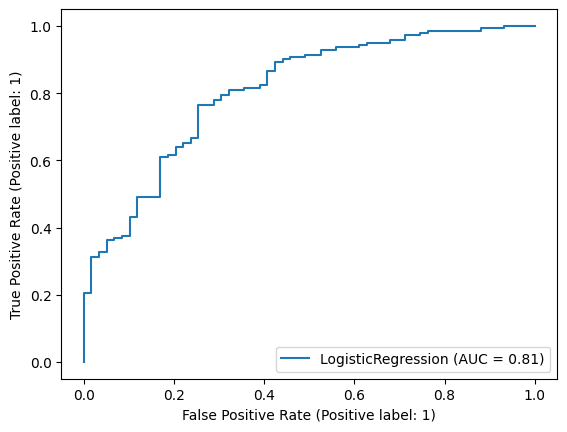

In [5]:
# Train
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train_class)

# Predict
y_pred_class = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Evaluate
print("🔍 Logistic Regression Classification Report:")
print(classification_report(y_test_class, y_pred_class))

print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))

# AUC & ROC
auc_score = roc_auc_score(y_test_class, y_pred_proba)
print("AUC Score:", round(auc_score, 3))

RocCurveDisplay.from_estimator(log_model, X_test, y_test_class)


In [8]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train)

# Fit the Logit model
logit_model = sm.Logit(y_train_class, X_train_const).fit()

# Print the full regression analysis table
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.457454
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Credit_risk   No. Observations:                  800
Model:                          Logit   Df Residuals:                      752
Method:                           MLE   Df Model:                           47
Date:                Tue, 22 Jul 2025   Pseudo R-squ.:                  0.2524
Time:                        17:33:21   Log-Likelihood:                -365.96
converged:                       True   LL-Null:                       -489.54
Covariance Type:            nonrobust   LLR p-value:                 5.734e-29
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const           

In [7]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model
ols_model = sm.OLS(y_train_reg, X_train_const).fit()

# Predict
y_pred_reg = ols_model.predict(X_test_const)

# Evaluate
print("🔍 Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("R^2 Score:", r2_score(y_test_reg, y_pred_reg))

# Full regression analysis table
print(ols_model.summary())

🔍 Linear Regression Performance:
MSE: 0.36766018665750333
MAE: 0.40460629943499776
R^2 Score: 0.518979253844843
                            OLS Regression Results                            
Dep. Variable:          Credit_amount   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     25.50
Date:                Tue, 22 Jul 2025   Prob (F-statistic):          1.38e-124
Time:                        17:31:42   Log-Likelihood:                -774.93
No. Observations:                 800   AIC:                             1646.
Df Residuals:                     752   BIC:                             1871.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|

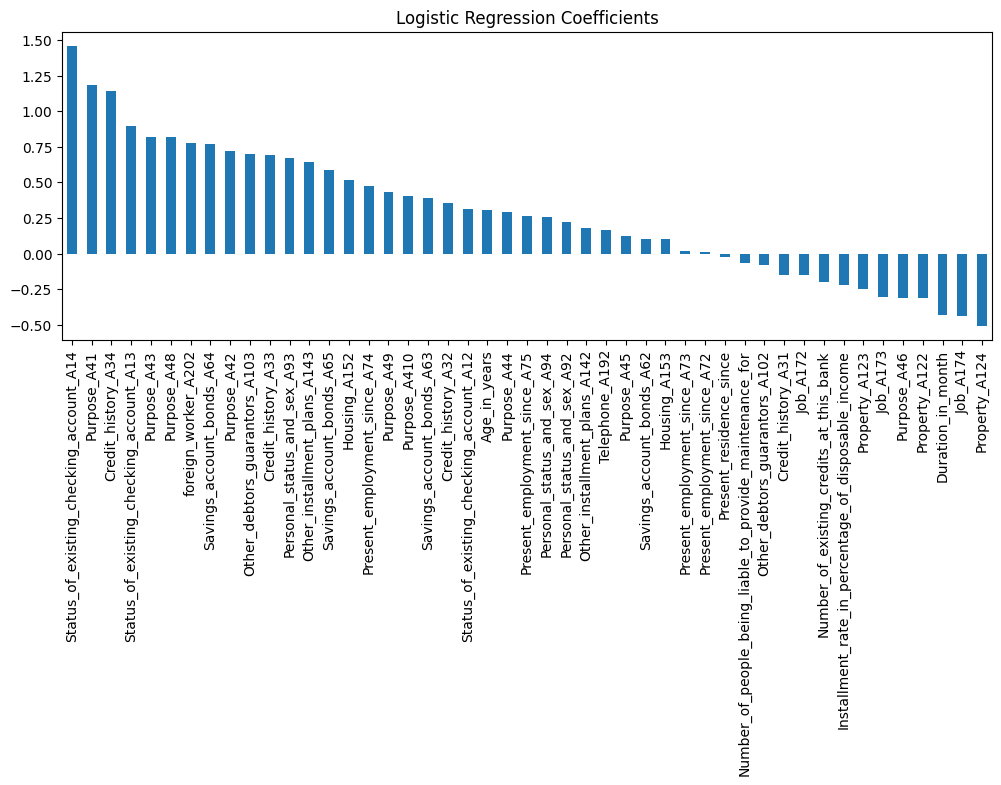

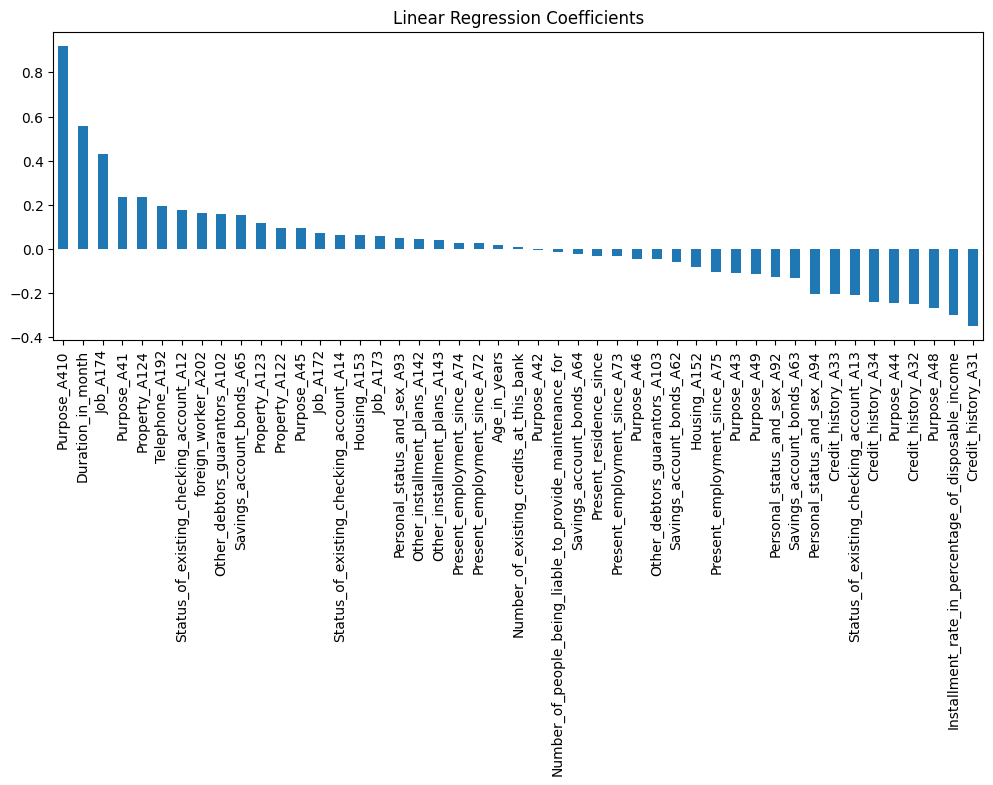

In [13]:
# Logistic Coefficients
log_coeffs = pd.Series(log_model.coef_[0], index=X.columns).sort_values(ascending=False)
log_coeffs.plot(kind='bar', figsize=(12, 4), title="Logistic Regression Coefficients")
plt.show()

# Linear Coefficients
lin_coeffs = pd.Series(lin_model.coef_, index=X.columns).sort_values(ascending=False)
lin_coeffs.plot(kind='bar', figsize=(12, 4), title="Linear Regression Coefficients")
plt.show()